# Importy

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from gensim.models import KeyedVectors
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from joblib import dump
from sklearn.preprocessing import StandardScaler

# Wczytywanie danych

In [2]:
file_path = 'score.csv'
dataset = pd.read_csv(file_path, sep=';')
df = pd.read_csv(file_path, sep=';')

# Analiza danych

In [3]:
pd.options.display.max_columns = None
#pd.options.display.max_rows = None
display(dataset)

,name_1,name_2,age_user1,age_user2,bmi_user1,bmi_user2,location_user1,location_user2,gender_user1,gender_user2,activities_user1,activities_user2,avg_time_user1,avg_time_user2,recommendation_score
0,Pierpaolo Fantuzzi,Rock And Roll,38,47,28.6,27.9,Italy,Spain,male,male,['Ride'],['Run'],3085.000000,24120.000000,0.30
1,SUPREMACA DE LA VERDAD - EL LOBO SAN ROGGER,Tom Doyle,24,42,23.9,25.0,Peru,USA,female,male,['Ride'],['Run'],5580.000000,2147.000000,0.07
2,Leonardo Coutio,Arnaud Hrlimann,16,47,27.4,22.0,Mexico,Switzerland,male,male,['Run'],['Ride'],19260.000000,559.000000,0.00
3,Daniel Metzler,Alessia Bornia,32,48,27.7,21.7,Switzerland,Italy,male,female,['Run'],['Ride'],7380.000000,8460.000000,0.20
4,Elsab Myburgh,Brendan Hurley,38,33,24.5,33.1,RSA,USA,male,male,['Run'],['Run'],1879.000000,2982.000000,0.75
5,Kane Kyan,Paul Travers,33,49,20.0,27.0,Singapore,United Kingdom,male,male,['Run'],['Ride'],2032.000000,637.000000,0.08
6,Peter Snow,Fred Lamart,42,33,29.4,27.2,USA,France,male,male,['Run'],['Ride'],2154.000000,9720.000000,0.24
7,Vijay Sinnur,Mirko Kleintz,35,26,24.4,24.5,India,Germany,male,male,['Walk'],['Walk'],5160.000000,894.000000,0.13
8,Sarah C,Leonardo Coutio,48,16,25.6,27.4,France,Mexico,female,male,['Walk'],['Run'],1574.000000,19260.000000,0.01
9,Gabriel Lyon,Graciela Chavez,34,49,25.1,25.7,USA,USA,male,female,['Hike'],['Walk'],1696.000000,2180.000000,0.90


In [4]:
embeddings = 50

dataset.drop(['avg_time_user1', 'avg_time_user2'], axis=1, inplace=True)
dataset['index'] = dataset.index

# age_data_file = "age_data.csv"  # Zmień na rzeczywistą ścieżkę do pliku
#
# # Wczytanie danych
# age_data = pd.read_csv(age_data_file)
#
# # Ścieżka do pliku glove.6B.300d.txt
# glove_file = "glove.6B.50d.txt"  # Zmień na rzeczywistą ścieżkę do pliku
#
# # Wczytanie modelu GloVe
# model = KeyedVectors.load_word2vec_format(glove_file, binary=False, no_header=True)
#
#
# # Funkcja do przekształcania nazw krajów i sprawdzania dostępności w GloVe
# def get_country_embedding(country_name):
#     words = country_name.lower().split()  # Dzielimy kraj na słowa
#     embeddings = []
#
#     for word in words:
#         if word in model:
#             embeddings.append(model[word])
#
#     if embeddings:
#         # Jeżeli wszystkie słowa są dostępne w modelu, zwróć średnią z ich embeddingów
#         return np.mean(embeddings, axis=0)
#     else:
#         # Jeżeli nie ma embeddingu, zwróć None (możesz to później obsłużyć)
#         return None
#
#
# # Wyodrębnienie nazw krajów z pliku CSV
# countries_from_file = age_data['country'].tolist()
#
# # Uzyskanie embeddingów dla krajów
# country_embeddings = {}
#
# for country in countries_from_file:
#     embedding = get_country_embedding(country)
#     if embedding is not None:
#         country_embeddings[country] = embedding

embedding_df = pd.read_csv('country_embeddings.csv')

# Przywrócenie embeddingów do słownika
country_embeddings = {
    row["country"]: row.iloc[1:].values.astype(float)
    for _, row in embedding_df.iterrows()
}

In [5]:
def map_location_to_embedding(country_name, country_embeddings):
    return country_embeddings.get(country_name)

# def transform_user_data(user_data, country_embeddings, embeddings_range=embeddings):
#     # Dodanie nowych kolumn z embeddingami dla location_user1 i location_user2
#     user_data['embedding_user1'] = user_data['location_user1'].apply(
#         lambda x: map_location_to_embedding(x, country_embeddings)
#     )
#     user_data['embedding_user2'] = user_data['location_user2'].apply(
#         lambda x: map_location_to_embedding(x, country_embeddings)
#     )
#
#     for i in range(embeddings_range):
#         user_data[f'embedding_diff_{i}'] = user_data['embedding_user1'].apply(
#             lambda x: x[i] if isinstance(x, np.ndarray) else np.nan
#         ) - user_data['embedding_user2'].apply(
#             lambda x: x[i] if isinstance(x, np.ndarray) else np.nan
#         )
#
#     # for i in range(embeddings_range):
#     #     user_data[f'embedding_user1_{i}'] = user_data['embedding_user1'].apply(
#     #         lambda x: x[i] if isinstance(x, np.ndarray) else np.nan)
#     #     user_data[f'embedding_user2_{i}'] = user_data['embedding_user2'].apply(
#     #         lambda x: x[i] if isinstance(x, np.ndarray) else np.nan)
#
#     user_data['age_diff'] = abs(user_data['age_user1'] - user_data['age_user2'])
#     user_data['bmi_diff'] = abs(user_data['bmi_user1'] - user_data['bmi_user2'])
#
#     user_data['gender_diff'] = abs(user_data['gender_user1'].map({'female': 0, 'male': 1}) - user_data['gender_user2'].map({'female': 0, 'male': 1}))
#
#     # user_data['gender_user1'] = user_data['gender_user1'].map({'female': 0, 'male': 1})
#     # user_data['gender_user2'] = user_data['gender_user2'].map({'female': 0, 'male': 1})
#
#     activity_columns = ['Walk', 'Ride', 'Run', 'Hike', 'Camping', 'Water Activities', 'Sport']
#     for activity in activity_columns:
#         user_data[f'activity_diff_{activity}'] = abs(user_data['activities_user1'].apply(lambda x: 1 if activity in x else 0) - user_data['activities_user2'].apply(lambda x: 1 if activity in x else 0))
#
#     # activity_columns = ['Walk', 'Ride', 'Run', 'Hike', 'Camping', 'Water Activities', 'Sport']
#     # for activity in activity_columns:
#     #     user_data[f'activity_user1_{activity}'] = user_data['activities_user1'].apply(lambda x: 1 if activity in x else 0)
#     #     user_data[f'activity_user2_{activity}'] = user_data['activities_user2'].apply(lambda x: 1 if activity in x else 0)
#
#     user_data.drop(['embedding_user1', 'embedding_user2'], axis=1, inplace=True)
#     user_data.drop(['location_user1', 'location_user2'], axis=1, inplace=True)
#     user_data.drop(['name_1', 'name_2'], axis=1, inplace=True)
#     user_data.drop(['activities_user1', 'activities_user2'], axis=1, inplace=True)
#     user_data.drop(['avg_time_user1', 'avg_time_user2'], axis=1, inplace=True)
#     user_data.drop(['age_user1', 'age_user2'], axis=1, inplace=True)
#     user_data.drop(['bmi_user1', 'bmi_user2'], axis=1, inplace=True)
#     user_data.drop(['gender_user1', 'gender_user2'], axis=1, inplace=True)
#
#     return user_data

def transform_user_data(user_data, country_embeddings, embeddings_range=embeddings):
    # Dodanie nowych kolumn z embeddingami dla location_user1 i location_user2
    user_data['embedding_user1'] = user_data['location_user1'].apply(
        lambda x: map_location_to_embedding(x, country_embeddings)
    )
    user_data['embedding_user2'] = user_data['location_user2'].apply(
        lambda x: map_location_to_embedding(x, country_embeddings)
    )

    # Rozbicie embeddingów na osobne kolumny i obliczenie różnic
    # for i in range(embeddings_range):
    #     user_data[f'embedding_diff_{i}'] = user_data['embedding_user1'].apply(
    #         lambda x: x[i] if isinstance(x, np.ndarray) else np.nan
    #     ) - user_data['embedding_user2'].apply(
    #         lambda x: x[i] if isinstance(x, np.ndarray) else np.nan
    #     )

    for i in range(embeddings_range):
        user_data[f'embedding_user1_{i}'] = user_data['embedding_user1'].apply(
            lambda x: x[i] if isinstance(x, np.ndarray) else np.nan)
        user_data[f'embedding_user2_{i}'] = user_data['embedding_user2'].apply(
            lambda x: x[i] if isinstance(x, np.ndarray) else np.nan)

    # user_data['age_diff'] = abs(user_data['age_user1'] - user_data['age_user2'])
    # user_data['bmi_diff'] = abs(user_data['bmi_user1'] - user_data['bmi_user2'])

    # user_data['gender_diff'] = abs(user_data['gender_user1'].map({'female': 0, 'male': 1}) - user_data['gender_user2'].map({'female': 0, 'male': 1}))

    user_data['gender_user1'] = user_data['gender_user1'].map({'female': 0, 'male': 1})
    user_data['gender_user2'] = user_data['gender_user2'].map({'female': 0, 'male': 1})

    # activity_columns = ['Walk', 'Ride', 'Run', 'Hike', 'Camping', 'Water Activities', 'Sport']
    # for activity in activity_columns:
    #     user_data[f'activity_diff_{activity}'] = abs(user_data['activities_user1'].apply(lambda x: 1 if activity in x else 0) - user_data['activities_user2'].apply(lambda x: 1 if activity in x else 0))

    activity_columns = ['Walk', 'Ride', 'Run', 'Hike', 'Camping', 'Water Activities', 'Sport']
    for activity in activity_columns:
        user_data[f'activity_user1_{activity}'] = user_data['activities_user1'].apply(lambda x: 1 if activity in x else 0)
        user_data[f'activity_user2_{activity}'] = user_data['activities_user2'].apply(lambda x: 1 if activity in x else 0)

    user_data.drop(['embedding_user1', 'embedding_user2'], axis=1, inplace=True)
    user_data.drop(['location_user1', 'location_user2'], axis=1, inplace=True)
    user_data.drop(['name_1', 'name_2'], axis=1, inplace=True)
    user_data.drop(['activities_user1', 'activities_user2'], axis=1, inplace=True)
    user_data.drop(['avg_time_user1', 'avg_time_user2'], axis=1, inplace=True)
    # user_data.drop(['age_user1', 'age_user2'], axis=1, inplace=True)
    # user_data.drop(['bmi_user1', 'bmi_user2'], axis=1, inplace=True)
    # user_data.drop(['gender_user1', 'gender_user2'], axis=1, inplace=True)

    return user_data

In [6]:
df = transform_user_data(df, country_embeddings)
display(df)

,recommendation_score,embedding_diff_0,embedding_diff_1,embedding_diff_2,embedding_diff_3,embedding_diff_4,embedding_diff_5,embedding_diff_6,embedding_diff_7,embedding_diff_8,embedding_diff_9,embedding_diff_10,embedding_diff_11,embedding_diff_12,embedding_diff_13,embedding_diff_14,embedding_diff_15,embedding_diff_16,embedding_diff_17,embedding_diff_18,embedding_diff_19,embedding_diff_20,embedding_diff_21,embedding_diff_22,embedding_diff_23,embedding_diff_24,embedding_diff_25,embedding_diff_26,embedding_diff_27,embedding_diff_28,embedding_diff_29,embedding_diff_30,embedding_diff_31,embedding_diff_32,embedding_diff_33,embedding_diff_34,embedding_diff_35,embedding_diff_36,embedding_diff_37,embedding_diff_38,embedding_diff_39,embedding_diff_40,embedding_diff_41,embedding_diff_42,embedding_diff_43,embedding_diff_44,embedding_diff_45,embedding_diff_46,embedding_diff_47,embedding_diff_48,embedding_diff_49,age_diff,bmi_diff,gender_diff,activity_diff_Walk,activity_diff_Ride,activity_diff_Run,activity_diff_Hike,activity_diff_Camping,activity_diff_Water Activities,activity_diff_Sport
0,0.30,0.610900,-0.991020,-0.590040,-0.683200,0.225121,0.215638,0.254224,-0.998450,-0.137980,-0.441395,-0.421850,-0.255350,-0.378870,0.060660,0.155200,0.12610,0.115330,1.032810,-0.134560,0.234830,0.500870,0.333960,-0.200540,0.182380,0.219726,-0.267700,0.108940,0.508790,-0.662390,-0.048100,-0.03420,0.350270,0.336510,0.205860,-0.219490,0.384380,0.388780,0.751150,-0.230240,-0.455420,-0.162280,-0.112300,-0.136200,0.070300,0.369000,0.671110,0.265920,0.266670,-0.116730,0.107740,9,0.7,0,0,1,1,0,0,0,0
1,0.07,1.819250,-0.776830,-0.359790,-0.171800,0.187180,-0.975054,1.042530,1.050870,-0.871960,1.400200,0.388780,0.117070,1.253290,0.177750,0.085680,-0.79174,-0.613506,-0.297902,1.121240,0.444430,-0.632890,-0.153301,-0.122476,-0.902200,0.362300,-0.325710,0.590660,0.921500,0.417980,0.900220,0.02500,-0.111900,-1.198775,-0.066750,0.742939,0.850140,-1.394540,0.140170,0.165544,0.407230,-1.673880,1.122710,0.637160,-0.922600,-0.682550,-0.263890,0.332580,0.585130,1.357400,-2.412200,18,1.1,1,0,1,1,0,0,0,0
2,0.00,-0.386800,-0.425722,0.721880,0.612370,-0.267630,-1.701370,-0.143550,-0.179530,0.319670,0.989600,-0.716600,0.196240,1.442380,-0.079930,-0.744270,-1.03541,-1.070960,0.933800,0.330650,-0.435650,-0.818330,-0.345320,0.504149,-1.020410,0.108730,-0.674700,-0.108410,0.367763,1.247410,-0.165490,0.98630,-0.250369,-0.660750,-1.129200,0.337210,0.376860,-1.137970,-0.930500,-0.156420,0.093779,-1.492620,0.946820,-0.813300,-0.776170,-0.406860,0.312182,-0.141200,-0.559682,0.239690,0.695828,31,5.4,0,0,1,1,0,0,0,0
3,0.20,-0.971710,1.110220,0.042430,0.127830,-0.307091,0.790382,-0.315234,0.652990,0.669750,-0.336375,0.413650,-0.124930,-0.079110,0.195250,0.266700,0.86470,0.836200,-0.979910,0.111130,0.284520,0.618000,0.008670,0.217150,0.074460,-0.643886,0.162600,-0.312510,0.092627,0.013500,-0.653610,-0.98230,-0.631770,0.418790,0.078040,-0.139440,-0.969320,0.132740,-0.254500,1.042740,0.580577,0.089180,-0.560730,1.016100,0.751170,-0.012930,-1.101492,-0.089060,0.310222,-0.546710,0.061420,16,6.0,1,0,1,1,0,0,0,0
4,0.75,0.129200,-1.332130,0.185190,-0.188300,-0.500390,-0.641404,0.834370,-0.775360,-0.136500,-0.491260,-0.656670,0.957700,0.387400,-0.473550,-1.232060,-0.05716,1.360324,-0.650180,-0.108160,-0.167032,-0.857330,-0.329360,0.313950,-0.187930,0.641158,1.199840,0.755430,-0.007810,-0.115590,-0.042600,-1.24908,-0.689040,-0.559035,0.575810,1.185670,1.287600,-0.429650,-0.340700,0.710124,0.632516,0.701200,1.248790,0.027070,0.379955,0.654240,0.224700,1.400160,0.922530,1.748270,-0.902744,5,8.6,0,0,0,0,0,0,0,0
5,0.08,0.285170,-0.050213,0.196226,1.117930,0.217555,-1.101737,0.544843,-0.923115,0.000785,0.650982,-0.012270,0.009468,0.190245,0.758760,0.111786,0.06584,-0.863558,0.563990,-0.215415,0.043210,1.034485,0.842755,-0.335950,-0.669464,0.344336,0.574300,1.248625,0.394695,-0.960200,0.086251,-0.22270,0.635514,1.031986,0.800305,0.159065,-0.529465,0.008106,-0.109305,0.592510,-0.203055,-0.761185,-0.049830,0.74

In [7]:
def split_dataset(df, dataset):
    return train_test_split(df.drop('recommendation_score', axis=1), df['recommendation_score'], dataset['index'],
                            test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test, indices_train, indices_test = split_dataset(df, dataset)
df = df.drop('recommendation_score', axis=1)

print(indices_train)
print(indices_test)
display(X_train)

132    132
225    225
238    238
119    119
136    136
66      66
217    217
154    154
168    168
229    229
233    233
156    156
117    117
84      84
125    125
167    167
245    245
109    109
172    172
234    234
73      73
158    158
115    115
75      75
237    237
82      82
29      29
126    126
79      79
86      86
5        5
56      56
186    186
231    231
170    170
65      65
140    140
124    124
213    213
148    148
31      31
12      12
35      35
28      28
42      42
218    218
22      22
93      93
212    212
101    101
51      51
95      95
143    143
199    199
76      76
41      41
113    113
152    152
78      78
147    147
26      26
241    241
164    164
243    243
137    137
0        0
2        2
77      77
46      46
100    100
127    127
150    150
248    248
90      90
85      85
175    175
195    195
98      98
36      36
61      61
162    162
139    139
11      11
244    244
198    198
27      27
155    155
4        4
122    122
32      32
144    144

,embedding_diff_0,embedding_diff_1,embedding_diff_2,embedding_diff_3,embedding_diff_4,embedding_diff_5,embedding_diff_6,embedding_diff_7,embedding_diff_8,embedding_diff_9,embedding_diff_10,embedding_diff_11,embedding_diff_12,embedding_diff_13,embedding_diff_14,embedding_diff_15,embedding_diff_16,embedding_diff_17,embedding_diff_18,embedding_diff_19,embedding_diff_20,embedding_diff_21,embedding_diff_22,embedding_diff_23,embedding_diff_24,embedding_diff_25,embedding_diff_26,embedding_diff_27,embedding_diff_28,embedding_diff_29,embedding_diff_30,embedding_diff_31,embedding_diff_32,embedding_diff_33,embedding_diff_34,embedding_diff_35,embedding_diff_36,embedding_diff_37,embedding_diff_38,embedding_diff_39,embedding_diff_40,embedding_diff_41,embedding_diff_42,embedding_diff_43,embedding_diff_44,embedding_diff_45,embedding_diff_46,embedding_diff_47,embedding_diff_48,embedding_diff_49,age_diff,bmi_diff,gender_diff,activity_diff_Walk,activity_diff_Ride,activity_diff_Run,activity_diff_Hike,activity_diff_Camping,activity_diff_Water Activities,activity_diff_Sport
132,-0.651013,-0.756950,0.997335,1.776120,0.438540,-0.999710,-0.418230,-0.392546,0.256686,1.409150,0.394960,0.449300,0.901420,0.046220,0.635590,0.03348,0.067125,0.980870,0.571980,0.231990,-0.843004,-0.815520,0.135890,0.000410,0.650039,0.442000,0.932700,-0.064393,-0.029370,-0.907391,-0.07740,-0.223770,0.197240,-0.340239,0.353920,0.358710,-0.649580,-0.268330,0.522695,-0.129390,-1.924220,0.362017,-0.973300,0.360700,-0.461002,0.559600,0.453240,0.117352,0.368360,-0.655700,12,2.6,1,1,1,0,0,0,0,0
225,-1.755703,0.319080,0.903655,0.777800,-0.382671,-0.913488,-0.501214,0.123804,0.924616,1.095115,0.663150,0.681650,0.672950,-0.345070,-0.056400,0.37466,0.358909,-0.090840,0.413420,-0.625230,-0.389440,-0.215580,0.563010,-0.523530,0.009253,0.132400,0.085720,0.108987,0.591750,-0.182451,-0.05670,-0.268720,-0.271700,-0.263229,0.435520,-0.510610,-0.629500,-0.729790,0.614105,0.093780,-0.907860,0.146240,-0.016700,-0.126500,-0.226210,0.055400,0.054240,0.292362,0.352640,-0.358350,32,3.6,1,0,0,0,0,0,0,0
238,-2.054690,0.338850,1.052390,1.049970,-0.275610,-0.718586,-0.653240,-1.109980,0.735670,-0.244750,-0.740760,0.407400,0.248410,-0.272790,-1.169210,0.02212,-0.541174,1.472020,-0.404590,-0.402890,-0.404740,0.553390,0.781370,-0.230510,0.068510,0.335010,-0.479670,-0.791977,0.315400,-0.683340,0.19160,-0.513840,-0.048775,-0.504350,0.134770,0.025900,0.276070,-1.492380,-0.441434,-0.659987,0.436580,-0.373280,-1.528460,0.018230,0.329120,0.771992,-0.170630,-0.433722,-0.813710,1.747730,4,0.1,1,0,1,0,1,0,0,0
119,-1.874550,0.802446,0.547683,-0.177130,0.141474,0.193709,-0.314427,0.338655,1.282065,-0.483625,0.053070,1.052092,0.729595,-0.336570,-1.176445,1.30977,0.493308,-0.208340,0.134525,0.470510,0.970245,0.066525,0.982710,-0.615846,-0.267314,-0.457500,-0.771765,-0.702925,0.808900,0.052549,0.28380,-0.766344,0.142064,-0.513295,0.573108,-0.171865,0.154744,-1.494275,-0.534230,0.491915,-0.301286,-0.255920,-0.784359,0.542850,-0.385209,-0.184915,-0.745630,-0.100015,-1.099600,0.097715,22,6.6,0,0,1,1,0,0,0,0
136,-1.566980,0.615760,-0.131130,2.300340,-0.695320,-0.700026,-1.022133,-0.834270,1.461030,0.039330,-0.773760,0.568070,0.717760,-0.052820,-0.610590,-0.09965,-0.545834,0.869860,-0.130890,-0.359220,-0.976590,1.263730,0.941300,0.041290,-0.361780,1.253510,-0.277333,-0.529070,-0.042020,-1.257060,-0.61360,-1.060330,-0.339615,-0.097346,0.517270,-0.188470,0.135492,-1.723380,0.326866,-0.518150,0.140880,-0.194870,-0.805160,0.958200,-0.410230,0.460380,-0.369430,-0.776150,-0.573080,1.261940,27,10.9,0,1,0,0,0,1,0,0
66,-3.026400,1.449070,1.094820,1.177800,-0.582701,0.071796,-0.968474,-0.456990,1.405420,-0.581125,-0.327110,0.282470,0.169300,-0.077540,-0.902510,0.88682,0.295026,0.492110,-0.293460,-0.118370,0.213260,0.562060,0.998520,-0.156050,-0.575376,0.497610,-0.792180,-0.699350,0.328900,-1.336950,-0.79070,-1.145610,0.370015,-0.426310,-0.004670,-0.943420,0.408810,-1.746880,0.601306,-0.079410,0.525760,-0.934010,-0.512360,0.769400,0.3161

In [8]:
# components = 50
# pca = PCA(n_components=components)
# X_train_pca = pca.fit_transform(X_train)
# X_test_pca = pca.fit_transform(X_test)
#
# X_train = pd.DataFrame(X_train_pca, columns=['PCA' + f'{i}' for i in range(components)])
# X_test = pd.DataFrame(X_test_pca, columns=['PCA' + f'{i}' for i in range(components)])
#
# display(X_test)

In [9]:
# Przykładowe hiperparametry do przeszukania
param_grid = {
    'n_estimators': [50, 70, 100],
    'max_depth': [12, 15, 17, 20, 25],
    'min_samples_split': [2]
}

# Tworzenie obiektu GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=5)

# Przeprowadzanie przeszukiwania
grid_search.fit(X_train, y_train)

# Najlepsze parametry
print(f"Best parameters: {grid_search.best_params_}")
# Najlepszy model
best_rf_model = grid_search.best_estimator_

# Predykcja i ocena najlepszego modelu
y_pred = best_rf_model.predict(X_test)

# Ocena modelu
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

test_results = dataset.iloc[indices_test].copy()
test_results['y_pred'] = y_pred
test_results.drop(columns=['index'], inplace=True)

# Wyświetlanie wyników
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
display(test_results)

Best parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 70}
Mean Squared Error: 0.05002896693877551
R-squared: 0.5392413918533515


,name_1,name_2,age_user1,age_user2,bmi_user1,bmi_user2,location_user1,location_user2,gender_user1,gender_user2,activities_user1,activities_user2,recommendation_score,y_pred
142,Catherine Brampton,Fitrial Kamal,37,38,22.4,29.3,United Kingdom,Indonesia,female,male,['Walk'],['Run'],0.77,0.620143
6,Peter Snow,Fred Lamart,42,33,29.4,27.2,USA,France,male,male,['Run'],['Ride'],0.24,0.231429
97,Deepesh Kumar2160,Sarah Almond,24,49,19.0,32.1,India,United Kingdom,male,female,['Walk'],['Ride'],0.01,0.239000
60,Stephanie Leonard,Miguel A O Z.,39,35,28.4,24.2,USA,Mexico,female,male,['Walk'],['Ride'],0.55,0.378429
112,Martin Arnholz,Adrian Borma,42,46,28.1,19.3,France,Romania,male,male,['Walk'],['Ride'],0.04,0.375857
181,FRANCIELLI ALENCAR,sarah stinson,46,39,29.0,34.5,Brazil,USA,female,female,['Walk'],['Walk'],0.70,0.640857
197,Juan Pablo mattiazzi,Dani Soriano Collantes,41,41,26.9,21.4,Argentina,Spain,male,female,['Ride'],['Walk'],0.66,0.581286
184,Umesh Ghai,Marcos Pardo Garcia,42,42,23.6,13.1,USA,Spain,male,male,['Walk'],['Run'],0.67,0.693286
9,Gabriel Lyon,Graciela Chavez,34,49,25.1,25.7,USA,USA,male,female,['Hike'],['Walk'],0.90,0.811143
104,Daniel Metzler,Anastasia Panchenko,32,33,27.7,29.0,Switzerland,USA,male,female,['Run'],['Run'],0.85,0.661571


In [10]:
# dump(best_rf_model, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [11]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
#
# scaler = StandardScaler()
# X_test = scaler.fit_transform(X_test)
#
# # Konwersja do DataFrame
# X_train = pd.DataFrame(X_train, columns=df.columns)
# X_test = pd.DataFrame(X_test, columns=df.columns)
#
# display(X_train)

Epoch 100/17000, Train Loss: 0.1139, Val Loss: 0.1231
Epoch 200/17000, Train Loss: 0.1115, Val Loss: 0.1208
Epoch 300/17000, Train Loss: 0.1095, Val Loss: 0.1188
Epoch 400/17000, Train Loss: 0.1076, Val Loss: 0.1168
Epoch 500/17000, Train Loss: 0.1058, Val Loss: 0.1151
Epoch 600/17000, Train Loss: 0.1041, Val Loss: 0.1134
Epoch 700/17000, Train Loss: 0.1025, Val Loss: 0.1118
Epoch 800/17000, Train Loss: 0.1010, Val Loss: 0.1104
Epoch 900/17000, Train Loss: 0.0996, Val Loss: 0.1091
Epoch 1000/17000, Train Loss: 0.0982, Val Loss: 0.1078
Epoch 1100/17000, Train Loss: 0.0969, Val Loss: 0.1065
Epoch 1200/17000, Train Loss: 0.0957, Val Loss: 0.1053
Epoch 1300/17000, Train Loss: 0.0945, Val Loss: 0.1042
Epoch 1400/17000, Train Loss: 0.0935, Val Loss: 0.1032
Epoch 1500/17000, Train Loss: 0.0925, Val Loss: 0.1024
Epoch 1600/17000, Train Loss: 0.0917, Val Loss: 0.1016
Epoch 1700/17000, Train Loss: 0.0909, Val Loss: 0.1008
Epoch 1800/17000, Train Loss: 0.0901, Val Loss: 0.1001
Epoch 1900/17000, T

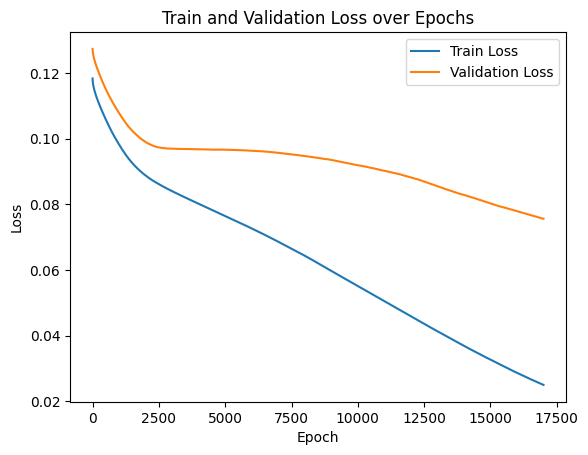

Mean Squared Error: 0.075615216969744
R-squared: 0.3035962112045397


,name_1,name_2,age_user1,age_user2,bmi_user1,bmi_user2,location_user1,location_user2,gender_user1,gender_user2,activities_user1,activities_user2,recommendation_score,y_pred
142,Catherine Brampton,Fitrial Kamal,37,38,22.4,29.3,United Kingdom,Indonesia,female,male,['Walk'],['Run'],0.77,0.745597
6,Peter Snow,Fred Lamart,42,33,29.4,27.2,USA,France,male,male,['Run'],['Ride'],0.24,0.233542
97,Deepesh Kumar2160,Sarah Almond,24,49,19.0,32.1,India,United Kingdom,male,female,['Walk'],['Ride'],0.01,0.260220
60,Stephanie Leonard,Miguel A O Z.,39,35,28.4,24.2,USA,Mexico,female,male,['Walk'],['Ride'],0.55,0.389121
112,Martin Arnholz,Adrian Borma,42,46,28.1,19.3,France,Romania,male,male,['Walk'],['Ride'],0.04,0.399281
181,FRANCIELLI ALENCAR,sarah stinson,46,39,29.0,34.5,Brazil,USA,female,female,['Walk'],['Walk'],0.70,0.405411
197,Juan Pablo mattiazzi,Dani Soriano Collantes,41,41,26.9,21.4,Argentina,Spain,male,female,['Ride'],['Walk'],0.66,0.661090
184,Umesh Ghai,Marcos Pardo Garcia,42,42,23.6,13.1,USA,Spain,male,male,['Walk'],['Run'],0.67,0.786270
9,Gabriel Lyon,Graciela Chavez,34,49,25.1,25.7,USA,USA,male,female,['Hike'],['Walk'],0.90,0.576530
104,Daniel Metzler,Anastasia Panchenko,32,33,27.7,29.0,Switzerland,USA,male,female,['Run'],['Run'],0.85,0.859703


In [12]:
class MLPModel(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(MLPModel, self).__init__()
        self.hidden = nn.Sequential(
            nn.Linear(input_size, hidden_size[0]),
            nn.ReLU(),
            nn.Linear(hidden_size[0], hidden_size[1]),
            nn.ReLU(),
            # nn.Linear(hidden_size[1], hidden_size[2]),
            # nn.ReLU(),
        )
        self.output = nn.Linear(hidden_size[1], 1)  # Ostatnia warstwa
        self.sigmoid = nn.Sigmoid()  # Ograniczenie do [0, 1]

    def forward(self, x):
        x = self.hidden(x)
        x = self.output(x)
        return self.sigmoid(x)

def train_model(model, optimizer, loss_fn, X_train, y_train, X_val, y_val, epochs):
    train_loss = []
    val_loss = []

    for epoch in range(epochs):
        # Trening
        model.train()
        optimizer.zero_grad()
        y_train_pred = model(X_train)
        loss = loss_fn(y_train_pred, y_train)
        loss.backward()
        optimizer.step()
        train_loss.append(loss.item())

        # Walidacja
        model.eval()
        with torch.no_grad():
            y_val_pred = model(X_val)
            val_loss.append(loss_fn(y_val_pred, y_val).item())

        # Print co kilka epok
        if (epoch + 1) % 100 == 0:
            print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss[-1]:.4f}, Val Loss: {val_loss[-1]:.4f}")

    # Wizualizacja strat
    plt.plot(range(epochs), train_loss, label='Train Loss')
    plt.plot(range(epochs), val_loss, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Train and Validation Loss over Epochs')
    plt.show()

    return train_loss, val_loss

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_val = torch.tensor(X_test.values, dtype=torch.float32)
y_val = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Model, optymalizator i funkcja kosztu
input_size = X_train.shape[1]
hidden_size = [64, 32]  # Możesz dostosować

model = MLPModel(input_size, hidden_size)
optimizer = optim.RMSprop(model.parameters(), lr=0.000004)
loss_fn = nn.MSELoss()

# 37500
epochs = 17000
train_loss, val_loss = train_model(model, optimizer, loss_fn, X_train_tensor, y_train_tensor, X_val, y_val, epochs)

model.eval()
with torch.no_grad():
    y_pred = model(X_val).numpy()
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    test_results = dataset.iloc[indices_test].copy()
    test_results['y_pred'] = y_pred
    test_results.drop(columns=['index'], inplace=True)

    # Wyświetlanie wyników
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    display(test_results)

In [13]:
torch.save(model, "model_full.pth")

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

# Konwersja do DataFrame
X_train = pd.DataFrame(X_train, columns=df.columns)
X_test = pd.DataFrame(X_test, columns=df.columns)

display(X_train)

,embedding_diff_0,embedding_diff_1,embedding_diff_2,embedding_diff_3,embedding_diff_4,embedding_diff_5,embedding_diff_6,embedding_diff_7,embedding_diff_8,embedding_diff_9,embedding_diff_10,embedding_diff_11,embedding_diff_12,embedding_diff_13,embedding_diff_14,embedding_diff_15,embedding_diff_16,embedding_diff_17,embedding_diff_18,embedding_diff_19,embedding_diff_20,embedding_diff_21,embedding_diff_22,embedding_diff_23,embedding_diff_24,embedding_diff_25,embedding_diff_26,embedding_diff_27,embedding_diff_28,embedding_diff_29,embedding_diff_30,embedding_diff_31,embedding_diff_32,embedding_diff_33,embedding_diff_34,embedding_diff_35,embedding_diff_36,embedding_diff_37,embedding_diff_38,embedding_diff_39,embedding_diff_40,embedding_diff_41,embedding_diff_42,embedding_diff_43,embedding_diff_44,embedding_diff_45,embedding_diff_46,embedding_diff_47,embedding_diff_48,embedding_diff_49,age_diff,bmi_diff,gender_diff,activity_diff_Walk,activity_diff_Ride,activity_diff_Run,activity_diff_Hike,activity_diff_Camping,activity_diff_Water Activities,activity_diff_Sport
0,-0.431108,-1.148451,1.565287,1.539819,0.849273,-1.509220,-0.559776,-0.532302,0.320579,1.849703,0.766998,0.812021,1.394810,0.036593,1.055121,-0.009146,0.061037,1.114109,1.201312,0.337550,-1.038063,-1.162135,0.189636,0.011993,1.013986,0.598400,1.649198,-0.104662,0.017016,-0.820844,-0.035339,-0.316994,0.319485,-0.795377,0.661687,0.593514,-1.135382,-0.258658,0.697092,-0.237009,-2.064274,0.572069,-1.190155,0.558488,-0.896958,1.217898,1.182777,0.130505,0.404637,-0.538537,0.234166,-0.684229,1.224745,1.304877,1.175139,-0.932287,-0.241249,-0.070888,-0.123404,0.0
1,-1.288728,0.461564,1.408172,0.622957,-0.716726,-1.382671,-0.674753,0.205521,1.160829,1.445461,1.268081,1.231413,1.014635,-1.124174,-0.042357,0.459753,0.664496,-0.183629,0.864361,-1.107896,-0.471009,-0.277134,0.980922,-1.121225,-0.085426,0.118501,0.094222,0.228024,1.359465,-0.090875,-0.009809,-0.385519,-0.563876,-0.617276,0.818569,-0.957044,-1.099994,-0.805381,0.834063,0.198484,-0.939273,0.231210,0.055687,-0.202248,-0.435463,0.075567,0.060623,0.509238,0.387437,-0.293971,2.758863,-0.415165,1.224745,-0.766356,-0.850963,-0.932287,-0.241249,-0.070888,-0.123404,0.0
2,-1.520844,0.491145,1.657622,0.872919,-0.512567,-1.096609,-0.885389,-1.557459,0.923136,-0.279282,-1.354965,0.736391,0.308200,-0.909755,-1.807245,-0.024758,-1.197028,1.708845,-0.873967,-0.732986,-0.490138,0.857213,1.385458,-0.487459,0.016242,0.432559,-0.943782,-1.500769,0.762180,-0.595239,0.296432,-0.759199,-0.143943,-1.174916,0.240352,-0.000101,0.495956,-1.708873,-0.747588,-1.272413,0.548877,-0.589468,-1.913176,0.023740,0.656066,1.699099,-0.571805,-1.062052,-0.888743,1.438250,-0.775713,-1.356888,1.224745,-0.766356,1.175139,-0.932287,4.145096,-0.070888,-0.123404,0.0
3,-1.380994,1.184802,0.811154,-0.254056,0.282786,0.242385,-0.415953,0.512526,1.610496,-0.586774,0.128216,1.900061,1.108893,-1.098959,-1.818720,1.744914,0.942455,-0.325910,0.271690,0.739743,1.228893,0.139014,1.758462,-1.320894,-0.559939,-0.795880,-1.480041,-1.329894,1.828800,0.145756,0.410147,-1.144135,0.215549,-1.195603,1.083095,-0.352843,0.282135,-1.711118,-0.886637,0.975403,-0.267860,-0.404076,-0.944085,0.842905,-0.747983,-0.468898,-2.188945,-0.339890,-1.201554,0.081136,1.496515,0.392026,-0.816497,-0.766356,1.175139,1.072631,-0.241249,-0.070888,-0.123404,0.0
4,-1.142214,0.905473,-0.327317,2.021265,-1.312929,-1.069368,-1.396501,-1.163491,1.835633,0.086400,-1.416622,1.026401,1.089199,-0.257210,-0.921288,-0.192112,-1.206666,0.979687,-0.292335,-0.659349,-1.205075,1.905071,1.681745,0.100412,-0.722018,1.856290,-0.572310,-0.996296,-0.010325,-1.172939,-0.696661,-1.592310,-0.691810,-0.233638,0.975741,-0.382460,0.248205,-1.982554,0.403656,-0.995633,0.221569,-0.307637,-0.971176,1.491452,-0.797163,0.993102,-1.130914,-1.803087,-0.625454,1.038695,2.127689,1.549000,-0.816497,1.304877,-0.850963,-0.932287,-0.241249,14.106736,-0.123404,0.0
5,-2.275226,2.152316,1.728784,0.990319,-1.098171,0.063451,-1.322155,-0.624388,1.765676

Epoch 100/17000, Train Loss: 0.1000, Val Loss: 0.1087
Epoch 200/17000, Train Loss: 0.0993, Val Loss: 0.1083
Epoch 300/17000, Train Loss: 0.0987, Val Loss: 0.1079
Epoch 400/17000, Train Loss: 0.0981, Val Loss: 0.1076
Epoch 500/17000, Train Loss: 0.0975, Val Loss: 0.1072
Epoch 600/17000, Train Loss: 0.0969, Val Loss: 0.1069
Epoch 700/17000, Train Loss: 0.0963, Val Loss: 0.1066
Epoch 800/17000, Train Loss: 0.0957, Val Loss: 0.1063
Epoch 900/17000, Train Loss: 0.0951, Val Loss: 0.1060
Epoch 1000/17000, Train Loss: 0.0945, Val Loss: 0.1056
Epoch 1100/17000, Train Loss: 0.0939, Val Loss: 0.1054
Epoch 1200/17000, Train Loss: 0.0933, Val Loss: 0.1051
Epoch 1300/17000, Train Loss: 0.0928, Val Loss: 0.1048
Epoch 1400/17000, Train Loss: 0.0922, Val Loss: 0.1044
Epoch 1500/17000, Train Loss: 0.0916, Val Loss: 0.1041
Epoch 1600/17000, Train Loss: 0.0910, Val Loss: 0.1038
Epoch 1700/17000, Train Loss: 0.0904, Val Loss: 0.1034
Epoch 1800/17000, Train Loss: 0.0898, Val Loss: 0.1031
Epoch 1900/17000, T

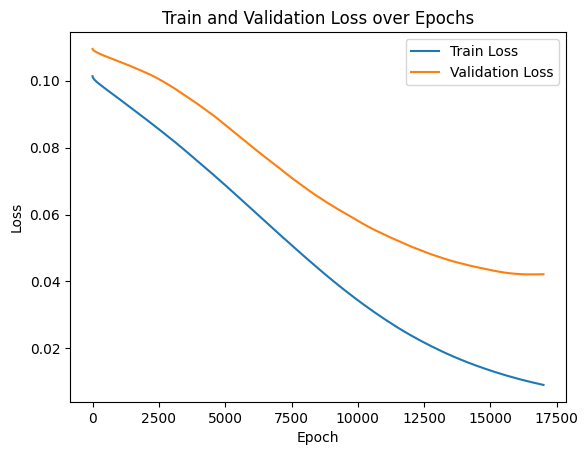

Mean Squared Error: 0.04216127940495973
R-squared: 0.6117015080466367


,name_1,name_2,age_user1,age_user2,bmi_user1,bmi_user2,location_user1,location_user2,gender_user1,gender_user2,activities_user1,activities_user2,recommendation_score,y_pred
142,Catherine Brampton,Fitrial Kamal,37,38,22.4,29.3,United Kingdom,Indonesia,female,male,['Walk'],['Run'],0.77,0.784572
6,Peter Snow,Fred Lamart,42,33,29.4,27.2,USA,France,male,male,['Run'],['Ride'],0.24,0.323152
97,Deepesh Kumar2160,Sarah Almond,24,49,19.0,32.1,India,United Kingdom,male,female,['Walk'],['Ride'],0.01,0.078096
60,Stephanie Leonard,Miguel A O Z.,39,35,28.4,24.2,USA,Mexico,female,male,['Walk'],['Ride'],0.55,0.455405
112,Martin Arnholz,Adrian Borma,42,46,28.1,19.3,France,Romania,male,male,['Walk'],['Ride'],0.04,0.207014
181,FRANCIELLI ALENCAR,sarah stinson,46,39,29.0,34.5,Brazil,USA,female,female,['Walk'],['Walk'],0.70,0.819225
197,Juan Pablo mattiazzi,Dani Soriano Collantes,41,41,26.9,21.4,Argentina,Spain,male,female,['Ride'],['Walk'],0.66,0.375455
184,Umesh Ghai,Marcos Pardo Garcia,42,42,23.6,13.1,USA,Spain,male,male,['Walk'],['Run'],0.67,0.437516
9,Gabriel Lyon,Graciela Chavez,34,49,25.1,25.7,USA,USA,male,female,['Hike'],['Walk'],0.90,0.508889
104,Daniel Metzler,Anastasia Panchenko,32,33,27.7,29.0,Switzerland,USA,male,female,['Run'],['Run'],0.85,0.921939


In [15]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_val = torch.tensor(X_test.values, dtype=torch.float32)
y_val = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Model, optymalizator i funkcja kosztu
input_size = X_train.shape[1]
hidden_size = [64, 32]  # Możesz dostosować

model = MLPModel(input_size, hidden_size)
optimizer = optim.RMSprop(model.parameters(), lr=0.000004)
loss_fn = nn.MSELoss()

# 37500
epochs = 17000
train_loss2, val_loss2 = train_model(model, optimizer, loss_fn, X_train_tensor, y_train_tensor, X_val, y_val, epochs)

model.eval()
with torch.no_grad():
    y_pred = model(X_val).numpy()
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    test_results = dataset.iloc[indices_test].copy()
    test_results['y_pred'] = y_pred
    test_results.drop(columns=['index'], inplace=True)

    # Wyświetlanie wyników
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    display(test_results)

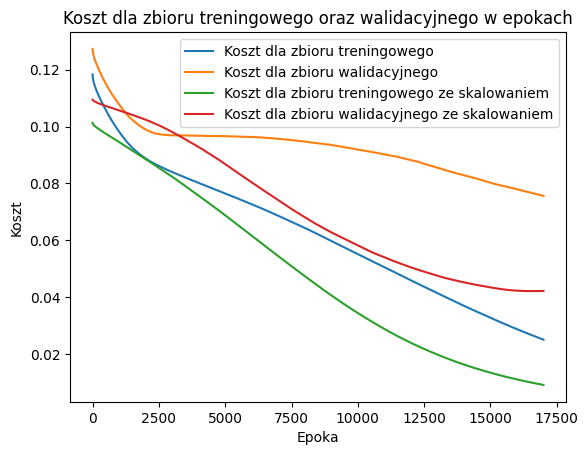

In [16]:
plt.plot(range(epochs), train_loss, label='Koszt dla zbioru treningowego')
plt.plot(range(epochs), val_loss, label='Koszt dla zbioru walidacyjnego')
plt.plot(range(epochs), train_loss2, label='Koszt dla zbioru treningowego ze skalowaniem')
plt.plot(range(epochs), val_loss2, label='Koszt dla zbioru walidacyjnego ze skalowaniem')
plt.xlabel('Epoka')
plt.ylabel('Koszt')
plt.legend()
plt.title('Koszt dla zbioru treningowego oraz walidacyjnego w epokach')
plt.show()